**KNN Clasification**

Using penguin dataset form sns.

**Importamos las librerias necesarias**

In [305]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

**Cargamos el  dataset**

Usaremos el dataset *penguin* que se encuentra en la librerias seaborn.

In [306]:
SNSpenguins = sns.load_dataset("penguins")
SNSpenguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


Hacemos el dataset en forma de dataframe.

In [307]:
#Convert the penguins dataset to a pandas dataframe
penguins = pd.DataFrame(SNSpenguins)

**Analizamos el dataset**

In [308]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


Eliminamos los datos nulos para poder trabajar con los restantes, de forma en que solo se cuenten con datos completos.

In [309]:
# A las filas nulas las eliminamos
penguins = penguins.dropna()
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


Mostramos las variables independientes y la variable dependiente.

In [310]:
#Datos cuantitativos
#Variables independientes(input)
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


<Axes: xlabel='species'>

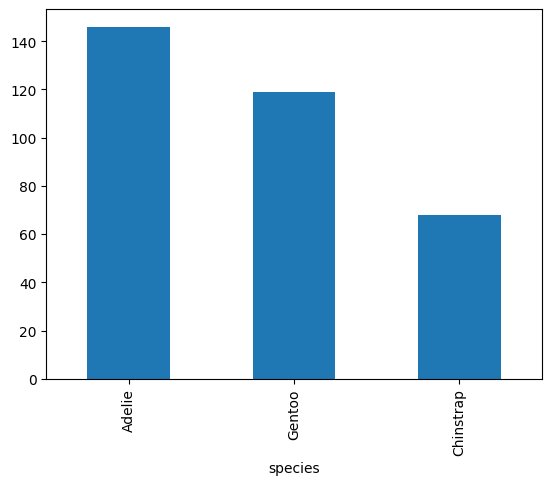

In [311]:
#Datos cualitativos
#Variables dependientes(output)
penguins['species'].unique()
penguins['species'].value_counts().plot(kind='bar')

Hacemos las clases como valores numericos.

In [312]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


Realizamos One-Hot-Encoding para poder trabajar con las variables categoricas.

In [313]:
#Convertimos las variables cualitativas a cuantitativas
penguins['species'] = penguins['species'].map({'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2})
penguins['island'] = penguins['island'].map({'Biscoe': 0, 'Dream': 1, 'Torgersen': 2})
penguins['sex'] = penguins['sex'].map({'Female': 0, 'Male': 1})
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,1
1,0,2,39.5,17.4,186.0,3800.0,0
2,0,2,40.3,18.0,195.0,3250.0,0
4,0,2,36.7,19.3,193.0,3450.0,0
5,0,2,39.3,20.6,190.0,3650.0,1
...,...,...,...,...,...,...,...
338,2,0,47.2,13.7,214.0,4925.0,0
340,2,0,46.8,14.3,215.0,4850.0,0
341,2,0,50.4,15.7,222.0,5750.0,1
342,2,0,45.2,14.8,212.0,5200.0,0


Analizamos la correlacion de las variables.

<Axes: >

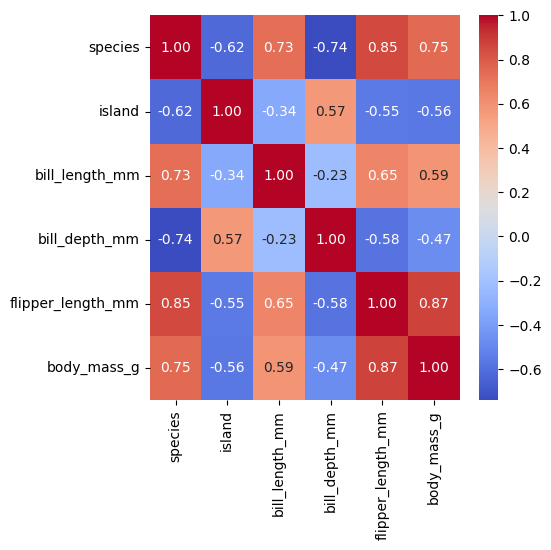

In [314]:
#Correlación
plt.figure(figsize=(5, 5))
#Matriz de correlación sin sex, species e island
variables = ['species','island','bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
sns.heatmap(penguins[variables].corr(), annot=True, fmt='.2f', cmap='coolwarm')

**Asignamos nuestros valores que usaremos para cada variable**

Lo que buscamos es predecir el tipo de penguin, para ello haremos uso de las siguientes variables:
* **Longitud del pico (bill_length_mm)**: La longitud del pico puede ser una característica distintiva entre especies de pingüinos.
* **Profundidad del pico (bill_depth_mm)**: Al igual que la longitud, la profundidad del pico puede variar entre especies y ser útil para la clasificación.
* **Longitud de la aleta (flipper_length_mm)**: La longitud de la aleta es otra característica física importante que puede diferenciar entre especies de pingüinos.
* **Peso corporal (body_mass_g)**: El peso corporal es un indicador muy importante de la especie de pingüino.

En grandes rasgos, nos enfocamos en sus caracteristicas físicas para reconocer de mejor manera los diversos tipos de especies.


In [315]:
#Variables independientes(input) seleccionadas
X = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]

#Variable dependiente(output) seleccionada
y = penguins['species']


Visualizamos nuestros datos en un gráfico 3D.

In [316]:
px.scatter_3d(penguins, x='bill_length_mm', y='bill_depth_mm', z='flipper_length_mm', size='body_mass_g',
                color='species',color_discrete_map={0:'blue', 1:'green', 2:'red'})

**Entrenamiento y prueba del modelo**

Realizamos la validación cruzada K-Fold

In [317]:
#RECUERDA QUE PUEDES COMPARARLO CON LOS RESULTADOS DE LA LIBRERÍA DE SCIKIT-LEARN
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

#Resultados
accuracy_val_scores = []
precision_val_scores = []

#Numero de pliegues
num_folds = 6

#Creamos indices para los pliegues
indices = np.arange(len(X))

#Desordenamos los indices
np.random.shuffle(indices)

#Iteramos para multiples validaciones
for i in range(num_folds):
    #Calculamos los indices para el pliegue i
    test_indices = indices[i*len(X)//num_folds: (i+1)*len(X)//num_folds]
    train_indices = np.concatenate((indices[:i*len(X)//num_folds], indices[(i+1)*len(X)//num_folds:]))
    
    #Extraemos los datos de entrenamiento y prueba
    X_train = X.iloc[train_indices]
    X_test = X.iloc[test_indices]
    y_train = y.iloc[train_indices]
    y_test = y.iloc[test_indices]
    
    #Creamos el clasificador
    knn = KNeighborsClassifier(n_neighbors=5)
    
    #Entrenamos el clasificador
    knn.fit(X_train, y_train)

    #Realizamos la prediccion
    y_pred = knn.predict(X_test)
    
    #Calculamos las metricas
    accuracy = metrics.accuracy_score(y_test, y_pred)
    
    #Guardamos la precision
    accuracy_val_scores.append(accuracy)

#Imprimimos los resultados
print("Accuracy obtenidos:", accuracy_val_scores)
print("Accuracy promedio:", np.mean(accuracy_val_scores))



Accuracy obtenidos: [0.7818181818181819, 0.9107142857142857, 0.6545454545454545, 0.6428571428571429, 0.8545454545454545, 0.8035714285714286]
Accuracy promedio: 0.7746753246753246


**Evaluamos el modelo.**

Matriz de confusión

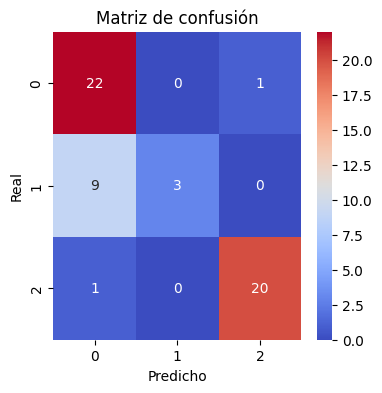

In [318]:
from sklearn.metrics import confusion_matrix
knn_cm = confusion_matrix(y_test, y_pred)
f, ax = plt.subplots(figsize=(4, 4))
sns.heatmap(knn_cm, annot=True, fmt='.0f', cmap='coolwarm', ax=ax)
plt.title('Matriz de confusión')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

In [319]:
print("Precision,Recall, Confusion Matrix, in testing\n")
print(metrics.classification_report(y_test, y_pred,digits=3))

Precision,Recall, Confusion Matrix, in testing

              precision    recall  f1-score   support

           0      0.688     0.957     0.800        23
           1      1.000     0.250     0.400        12
           2      0.952     0.952     0.952        21

    accuracy                          0.804        56
   macro avg      0.880     0.720     0.717        56
weighted avg      0.854     0.804     0.771        56



**Calculamos K necesarios**

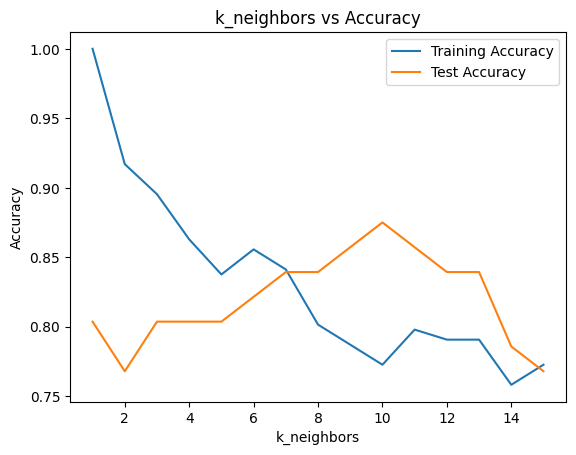

In [320]:
from sklearn.metrics import accuracy_score#REVISA ESTO
#Lista para almacenar los valores de precision
train_accuracy = []
test_accuracy = []

#Iteramos del 1 al 15 para probar diferentes valores de de k neighbors
for k in range(1, 16):
    #Defirnir modelo con el valor actual de k_neighbors
    knn = KNeighborsClassifier(n_neighbors=k)

    #Entrenar el modelo
    knn.fit(X_train, y_train)

    #Predecir valores de entrenamiento y prueba
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)

    #Calcular la precicion y almacenarla en las listas correspondientes
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    train_accuracy.append(train_acc)
    test_accuracy.append(test_acc)

#Graficar LA pecision obtenida de cada iteracion
plt.plot(range(1, 16), train_accuracy, label='Training Accuracy')
plt.plot(range(1, 16), test_accuracy, label='Test Accuracy')
plt.xlabel('k_neighbors')
plt.ylabel('Accuracy')
plt.title('k_neighbors vs Accuracy')
plt.legend()
plt.show()


**Thanks for watch my code**

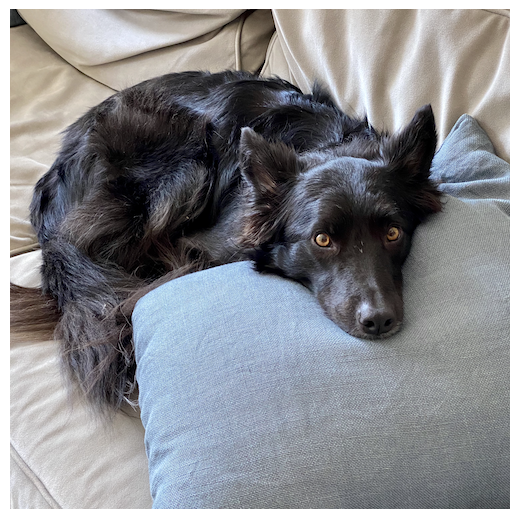

In [323]:
sns.dogplot()